# Прогноз цен на недвижимость в Москве

https://www.kaggle.com/c/real-estate-price-prediction-moscow/data

## Подключение библиотек и скриптов

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold

from datetime import datetime

sns.set(palette='magma', font_scale=1.5)
import warnings
warnings.filterwarnings('ignore')

## Загрузка данных

### Описание датасета
*Id* - идентификационный номер квартиры <br/>
*DistrictId* - идентификационный номер района <br/>
*Rooms* - количество комнат <br/>
*Square* - площадь <br/>
*LifeSquare* - жилая площадь <br/>
*KitchenSquare* - площадь кухни <br/>
*Floor* - этаж <br/>
*HouseFloor* - количество этажей в доме <br/>
*HouseYear* - год постройки дома <br/>
*Ecology_1, Ecology_2, Ecology_3* - экологические показатели местности <br/>
*Social_1, Social_2, Social_3* - социальные показатели местности <br/>
*Healthcare_1, Helthcare_2* - показатели местности, связанные с охраной здоровья <br/>
*Shops_1, Shops_2* - показатели, связанные с наличием магазинов, торговых центров <br/>
*Price* - цена квартиры

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1260,61,2.0,49.090728,33.272626,6.0,3,12.0,1981,0.300323,B,B,52,10311,6,NaN,1,9,B,119367.455796
9996,16265,27,2.0,64.307684,37.038420,9.0,13,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,199715.148807
9997,2795,178,1.0,29.648057,16.555363,5.0,3,5.0,1958,0.460556,B,B,20,4386,14,NaN,1,5,B,165953.912580
9998,14561,21,1.0,32.330292,22.326870,5.0,3,9.0,1969,0.194489,B,B,47,8004,3,125.0,3,5,B,171842.411855


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

## Обзор данных

### Целевая переменная

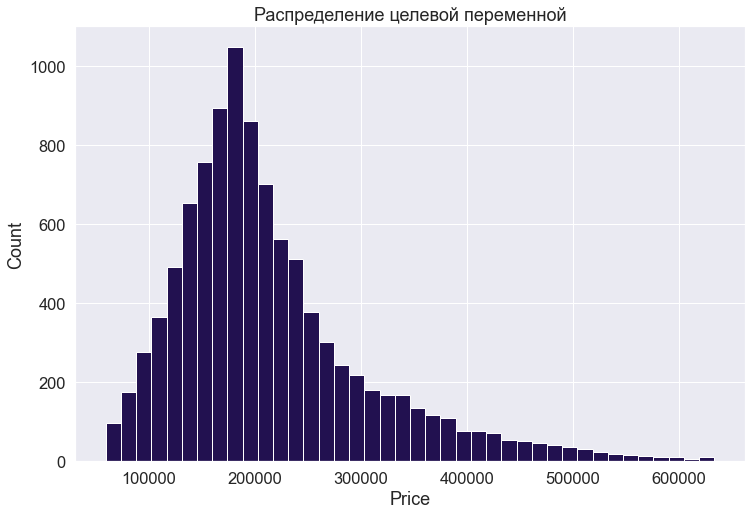

In [5]:
plt.figure(figsize = (12, 8))
plt.hist(data['Price'], bins=40)
plt.ylabel('Count')
plt.xlabel('Price')
plt.title('Распределение целевой переменной')
plt.show()

### Количественные переменные

In [6]:
n_f = data.select_dtypes(include=['float64', 'float32', 'float16', 'int64'])
n_f.drop(['Price', 'Id'], axis=1, inplace=True)

In [7]:
data.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


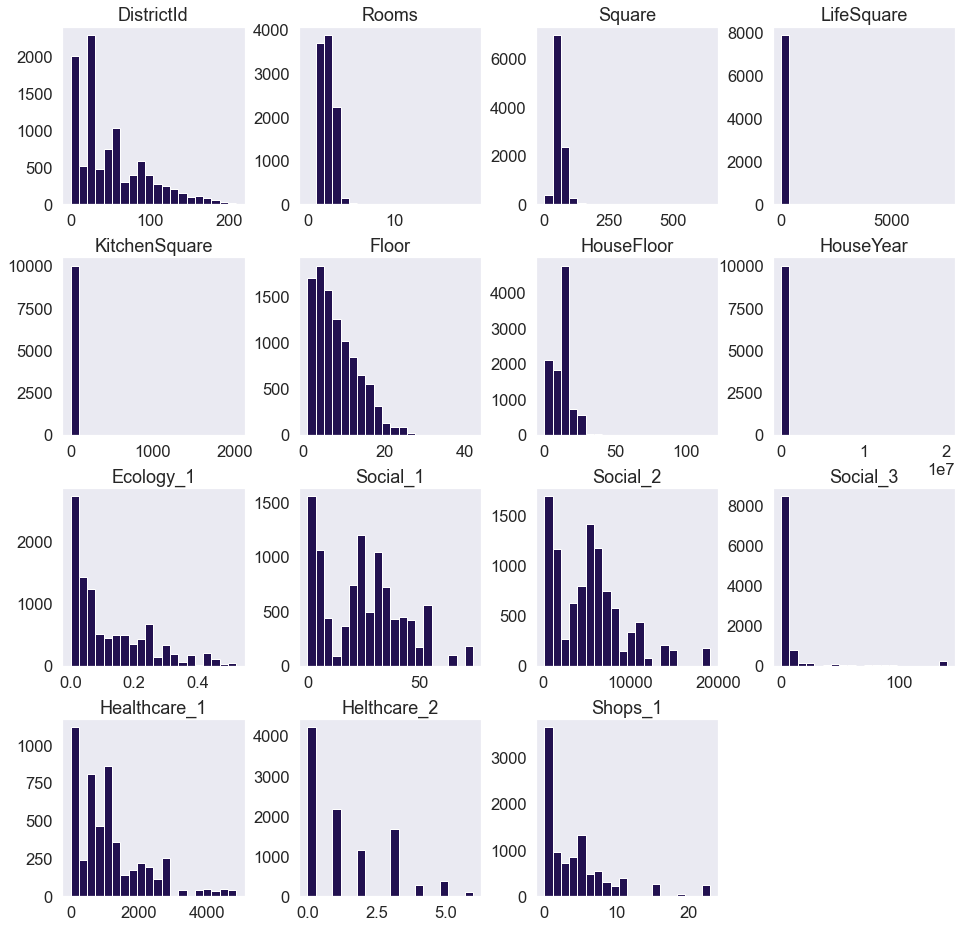

In [8]:
n_f.hist(figsize=(16,16), bins=20, grid=False);

### Категориальные переменные

In [9]:
data['Ecology_2'].value_counts()

B    9903
A      97
Name: Ecology_2, dtype: int64

In [10]:
data['Ecology_3'].value_counts()

B    9725
A     275
Name: Ecology_3, dtype: int64

In [11]:
data['Shops_2'].value_counts()

B    9175
A     825
Name: Shops_2, dtype: int64

## Анализ зависимости таргета от фичей

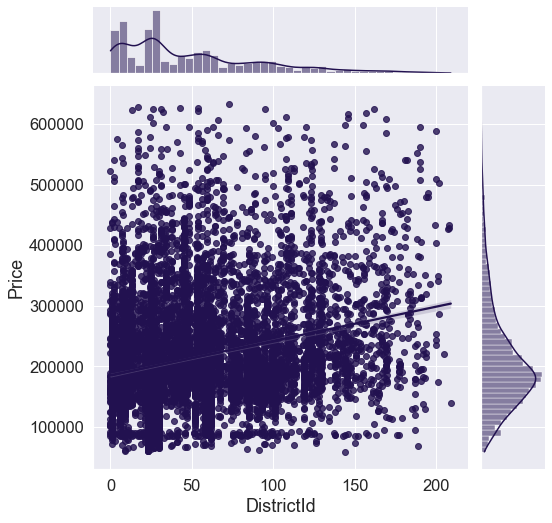

In [12]:
grid = sns.jointplot(data['DistrictId'], data['Price'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

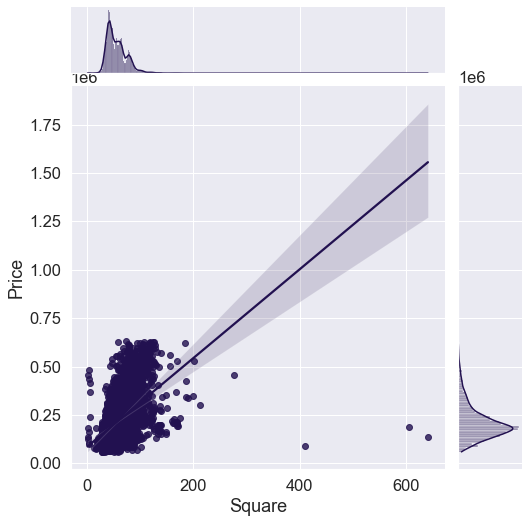

In [13]:
grid = sns.jointplot(data['Square'], data['Price'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

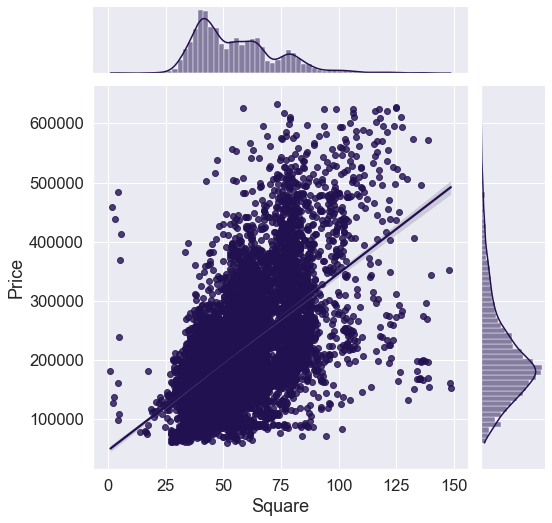

In [14]:
grid = sns.jointplot(data.loc[data['Square'] < 150, 'Square'], data['Price'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

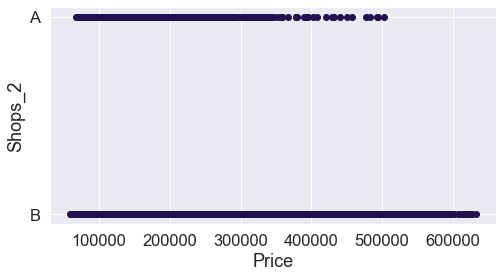

In [15]:
plt.figure(figsize=(8, 4))

plt.scatter(data['Price'], data['Shops_2'])

plt.xlabel('Price')
plt.ylabel('Shops_2')
plt.show()

## Оптимизация памяти

In [16]:
def optimize(df):
    df['DistrictId'] = df['DistrictId'].astype(np.int16)
    df['Rooms'] = df['Rooms'].astype(np.int8)
    df['KitchenSquare'] = df['KitchenSquare'].astype(np.int16)
    df['Floor'] = df['Floor'].astype(np.int8)
    df['HouseFloor'] = df['HouseFloor'].astype(np.int16)
    df['HouseYear'] = df['HouseYear'].astype(np.int16)
    df['Social_1'] = df['Social_1'].astype(np.int16)
    df['Social_3'] = df['Social_3'].astype(np.int16)
    df['Helthcare_2'] = df['Helthcare_2'].astype(np.int8)
    df['Shops_1'] = df['Shops_1'].astype(np.int8)

In [17]:
optimize(data)

## Обработка выбросов и пропусков

### Id

In [18]:
data.drop('Id', axis=1, inplace=True)

### Healthcare_1
Заполним недостающие значения Healthcare_1 средним значением.

In [19]:
data.loc[np.isnan(data['Healthcare_1']), 'Healthcare_1'] = np.mean(data['Healthcare_1'])

### Shops_2, Ecology_2, Ecology_3
Приравняем значения бинарных переменных А к 0, а значения В к 1.

In [20]:
data.loc[data['Shops_2'] == 'A', 'Shops_2'] = 0
data.loc[data['Shops_2'] == 'B', 'Shops_2'] = 1
data.loc[data['Ecology_2'] == 'A', 'Ecology_2'] = 0
data.loc[data['Ecology_2'] == 'B', 'Ecology_2'] = 1
data.loc[data['Ecology_3'] == 'A', 'Ecology_3'] = 0
data.loc[data['Ecology_3'] == 'B', 'Ecology_3'] = 1

### Square, LifeSquare, KitchenSquare
Так как минимальная площадь квартиры в России - 11 квадратных метров, кухни - 5, а минимальная жилая площадь - 6 квадратных метров, то приравняем все значения меньше этой величины, а также значения сильно превосходящие среднюю площадь к NaN.

In [21]:
data.loc[data['Square'] < 11, 'Square'] = np.NaN
data.loc[data['Square'] > 250, 'Square'] = np.NaN
data.loc[data['LifeSquare'] < 6, 'LifeSquare'] = np.NaN
data.loc[data['LifeSquare'] > 200, 'LifeSquare'] = np.NaN
data.loc[data['KitchenSquare'] < 5, 'KitchenSquare'] = np.NaN
data.loc[data['KitchenSquare'] > 50, 'KitchenSquare'] = np.NaN

Найдем индексы строк, в которых известны все значения площадей.

In [22]:
iv = data.loc[~np.isnan(data['Square']) & ~np.isnan(data['LifeSquare'])\
                & ~np.isnan(data['KitchenSquare']), :].index.values

Среди этих записей найдем медиану соотношений площади квартиры к жилой площади и медиану соотношений площади квартиры к площади кухни.

In [23]:
sq_ls = (data.loc[iv, 'Square'] / data.loc[iv, 'LifeSquare']).median()
sq_ks = (data.loc[iv, 'Square'] / data.loc[iv, 'KitchenSquare']).median()

Используя эти медианы, найдем площадь там, где её значение равно NaN.

In [24]:
data.loc[~np.isnan(data['Square']) & np.isnan(data['LifeSquare']), 'LifeSquare'] = data['Square'] / sq_ls
data.loc[~np.isnan(data['Square']) & np.isnan(data['KitchenSquare']), 'KitchenSquare'] = data['Square'] / sq_ks
data.loc[np.isnan(data['Square']) & ~np.isnan(data['LifeSquare']), 'Square'] = data['LifeSquare'] * sq_ls
data.loc[np.isnan(data['Square']) & ~np.isnan(data['KitchenSquare']), 'Square'] = data['KitchenSquare'] * sq_ks

Найдем среднее и медиану известных площадей и приравняем к ним неизвестные значения.

In [25]:
Mean_S = (data.loc[~np.isnan(data['Square']), 'Square']).mean()
Mean_LS = (data.loc[~np.isnan(data['LifeSquare']), 'LifeSquare']).mean()
Med_KS = (data['KitchenSquare']).median()
data.loc[np.isnan(data['Square']), 'Square'] = Mean_S
data.loc[np.isnan(data['LifeSquare']), 'LifeSquare'] = Mean_LS
data.loc[np.isnan(data['KitchenSquare']), 'KitchenSquare'] = Med_KS

Выберем записи, где жилая площадь или площадь кухни превышает площадь квартиры, и припишем им значения, полученные из найденных ранее соотношений.<br/>
В тех записях, где жилая площадь меньше площади кухни, изменим их значения на среднее и медиану.

In [26]:
data.loc[data['Square'] < data['LifeSquare'], 'LifeSquare'] = data['Square'] / sq_ls
data.loc[data['Square'] < data['KitchenSquare'], 'KitchenSquare'] = data['Square'] / sq_ks
data.loc[data['LifeSquare'] < data['KitchenSquare'], 'LifeSquare'] = Mean_LS
data.loc[data['LifeSquare'] < data['KitchenSquare'], 'KitchenSquare'] = Med_KS

### Rooms

In [27]:
data['Rooms'].sort_values()

2194     0
6401     0
7929     0
7644     0
3780     0
        ..
1459     5
8794     6
2728    10
2004    10
6088    19
Name: Rooms, Length: 10000, dtype: int8

Вычислим медиану соотношений известных площадей к известным комнатам.

In [28]:
sq_r = (data.loc[~np.isnan(data['Rooms']), 'Square'] / data.loc[~np.isnan(data['Rooms']), 'Rooms']).median()

Так как меньше одной комнаты в квартире быть не может, то приравняем все значения меньше этой величины, а также значения больше 6, которые редко встречаются, к NaN.

In [29]:
data.loc[data['Rooms'] < 1, 'Rooms'] = np.NaN
data.loc[data['Rooms'] > 6, 'Rooms'] = np.NaN

С помощью медианы соотношений площадей к комнатам найдем количество комнат в тех местах, где они равны NaN.

In [30]:
data.loc[np.isnan(data['Rooms']), 'Rooms'] = round(data.loc[np.isnan(data['Rooms']), 'Square'] / sq_r)

### Floor, HouseFloor

Так как этаж квартиры не может превышать этажи дома, в строках, где это не так, поменяем их местами.

In [31]:
ind = data.loc[data['Floor'] > data['HouseFloor'], 'Floor'].index
fl = data.loc[data['Floor'] > data['HouseFloor'], 'Floor']
hf = data.loc[data['Floor'] > data['HouseFloor'], 'HouseFloor']
data.loc[ind, 'HouseFloor'] = fl
data.loc[ind, 'Floor'] = hf

Количество этажей и номер этажа не могут быть равны 0, поэтому приведем неподходящие значения к медиане.

In [32]:
data.loc[data['Floor'] < 1, 'Floor'] = np.median(data['Floor'])
data.loc[data['HouseFloor'] < 1, 'HouseFloor'] = np.median(data['HouseFloor'])

Наибольшее количество этажей в России - 95, поэтому значения, превышающие это количество, приравняем к медиане.

In [33]:
data.loc[data['Floor'] > 95, 'Floor'] = np.median(data['Floor'])
data.loc[data['HouseFloor'] > 95, 'HouseFloor'] = np.median(data['HouseFloor'])

### HouseYear

In [34]:
data.loc[: , 'HouseYear'].sort_values()

9163   -2005
6794    1910
2066    1912
2795    1912
6250    1914
        ... 
5641    2020
1077    2020
7246    2020
8664    2020
8828    4968
Name: HouseYear, Length: 10000, dtype: int16

Среди значений выше можно заметить два странных экстремальных значения, которые похожи на опечатку. Приведем их к нормальному значению.

In [35]:
data.loc[data['HouseYear'] == 4968, 'HouseYear'] = 1968
data.loc[data['HouseYear'] == -2005, 'HouseYear'] = 2005
data.loc[data['HouseYear'] > datetime.now().year, 'HouseYear'] = datetime.now().year
data.loc[data['HouseYear'] < 1900, 'HouseYear'] = datetime.now().year

### Поиск выбросов с помощью box plot

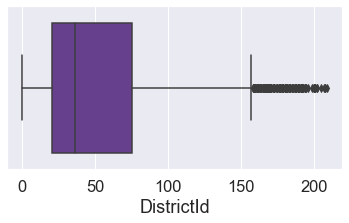

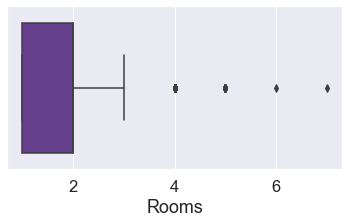

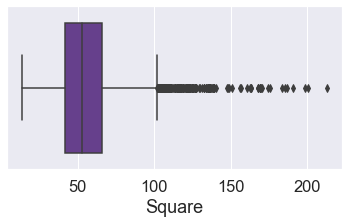

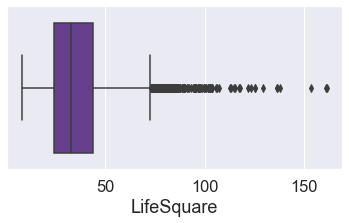

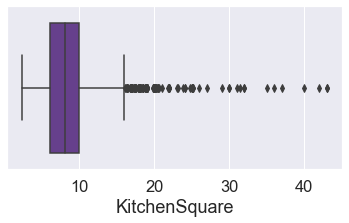

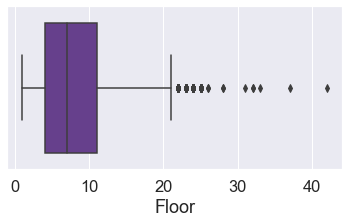

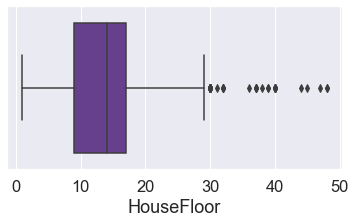

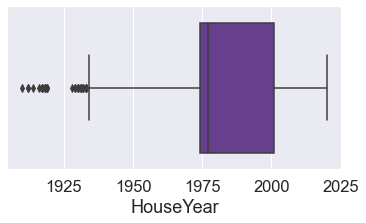

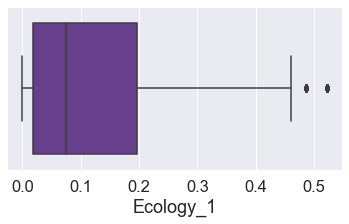

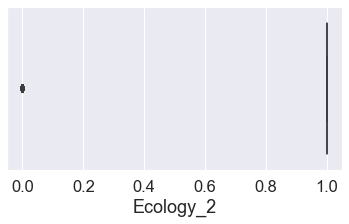

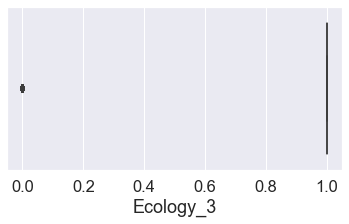

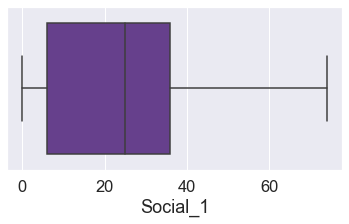

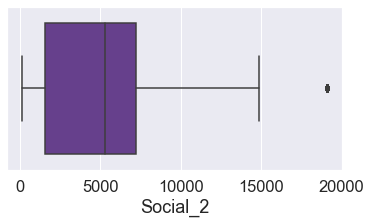

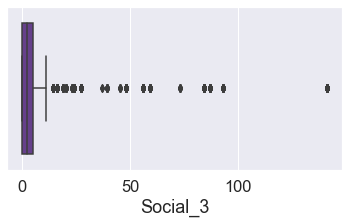

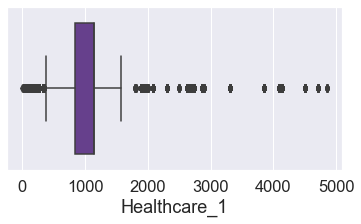

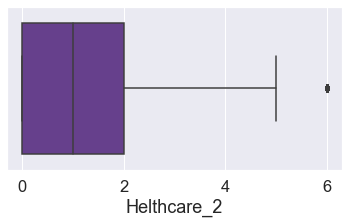

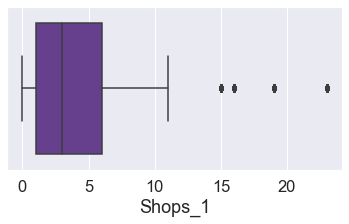

In [36]:
feature_names = data.columns.drop('Price')
for i in range(len(feature_names)-1):
    plt.figure(figsize=(6, 3))
    sns.boxplot(data[feature_names[i]], whis=1.5, color='rebeccapurple')
    plt.xlabel(feature_names[i])
    plt.show()

Функция для проверки R2 в любом датафрейме с помощью алгоритма LinearRegression

In [37]:
def lr(tmp):
    featurenames = tmp.columns.drop('Price')
    y_tmp = pd.DataFrame(tmp['Price'], columns=['Price'])
    X_tmp = pd.DataFrame(tmp[featurenames], columns=featurenames)
    Xtmp_train, Xtmp_test, ytmp_train, ytmp_test = train_test_split(X_tmp, y_tmp, test_size=0.3, random_state=42)
    tmpmodel = LinearRegression()
    tmpmodel.fit(Xtmp_train, ytmp_train)
    ytmp_pred = tmpmodel.predict(Xtmp_test)
    ytmp_pred_train = tmpmodel.predict(Xtmp_train)
    return [r2_score(ytmp_train, ytmp_pred_train), r2_score(ytmp_test, ytmp_pred)]

Функция для поиска крайних значений с наилучшим R2

In [38]:
def predlist(name, l, t):
    r2_predr = []
    r2_predt = []
    if t == 'before':
        for value in l:
            tmp = data.copy()
            tmp.loc[tmp[name] < value, name] = np.median(tmp[name])
            pt, pr = lr(tmp)
            r2_predt.append(pt)
            r2_predr.append(pr)
    if t == 'after':
        for value in l:
            tmp = data.copy()
            tmp.loc[tmp[name] > value, name] = np.median(tmp[name])
            pt, pr = lr(tmp)
            r2_predt.append(pt)
            r2_predr.append(pr)
    best_result = l[r2_predr.index(max(r2_predr))]
    
    plt.plot(l, r2_predt, label="r2 train")
    plt.plot(l, r2_predr, label="r2 real", c='mediumpurple')
    plt.xlabel('Крайние значения')
    plt.ylabel('r2')
    plt.legend()
    plt.title(name)
    plt.grid()
    plt.show()
    print(best_result)

Найдем лучшие крайние значения для признаков

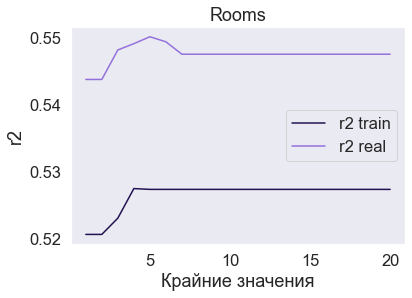

5.0


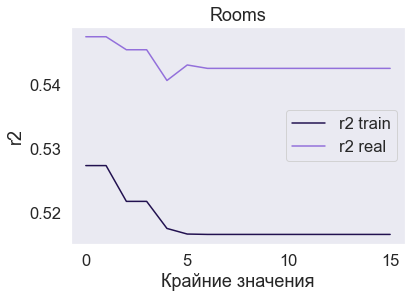

0.0


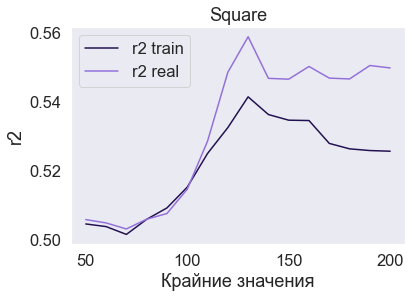

130.0


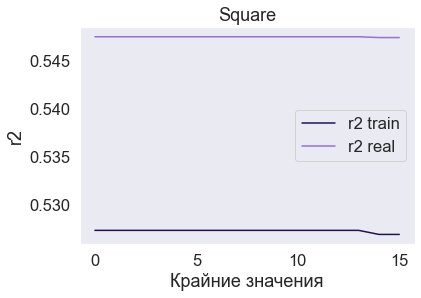

0.0


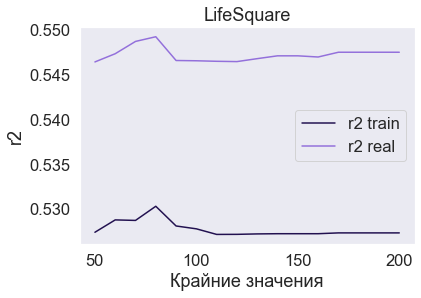

80.0


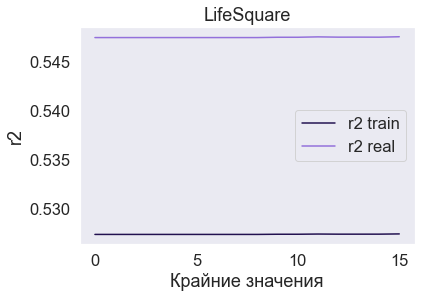

15.0


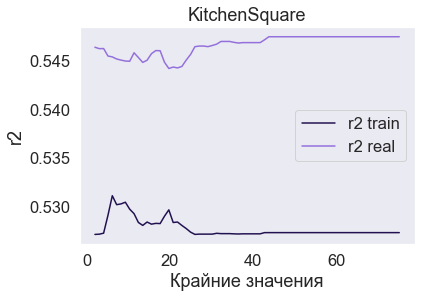

43.714285714285715


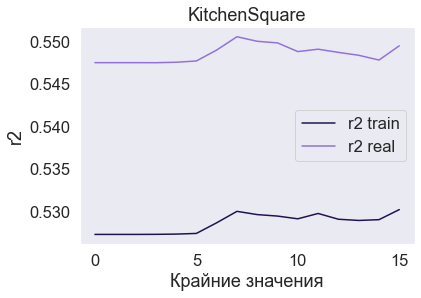

7.0


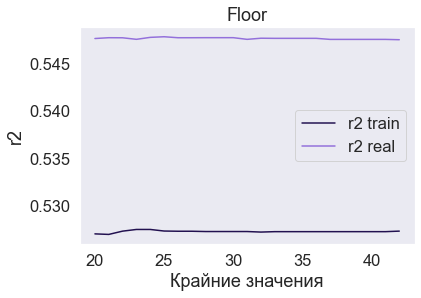

25.0


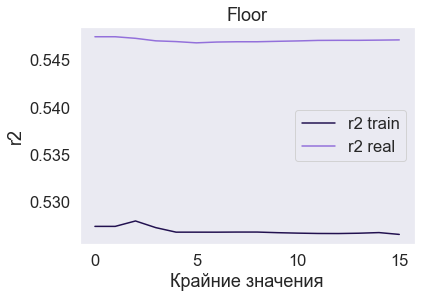

0.0


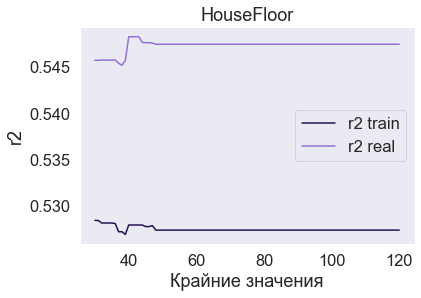

40.0


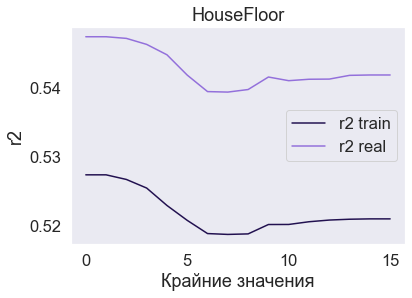

0.0


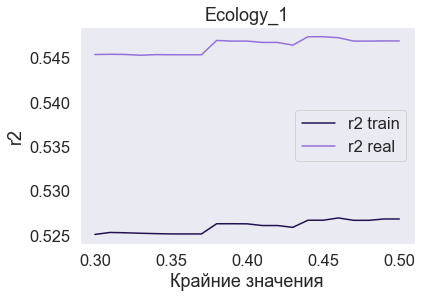

0.44


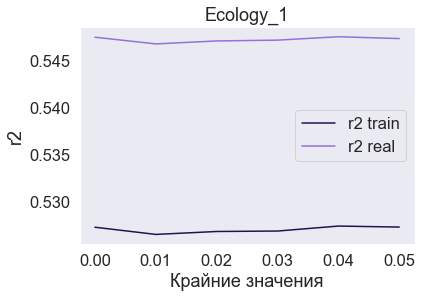

0.04


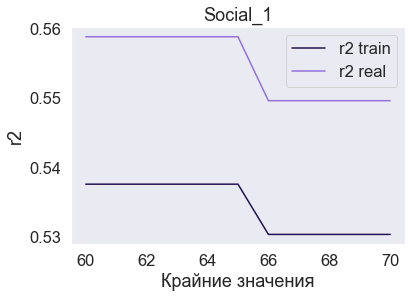

60.0


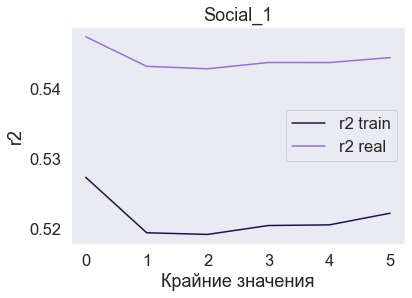

0.0


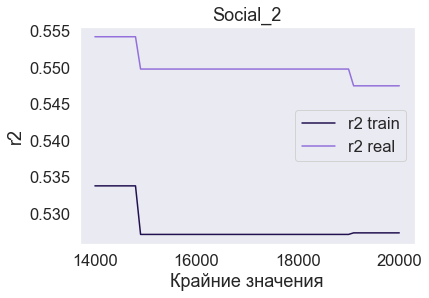

14000.0


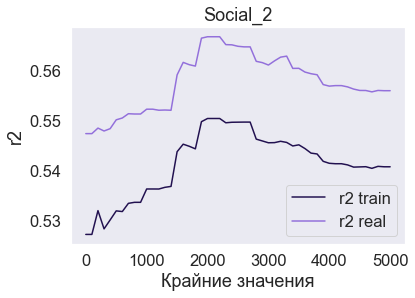

2000.0


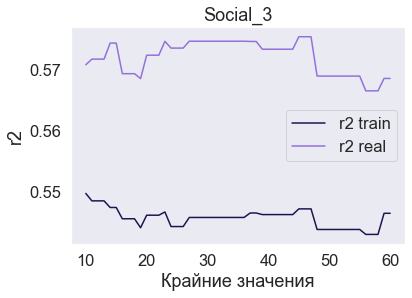

45.0


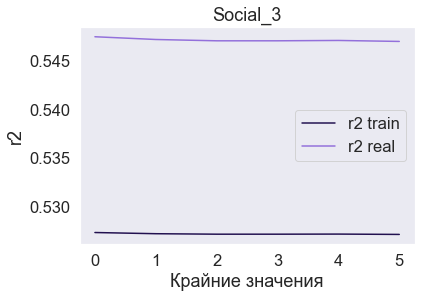

0.0


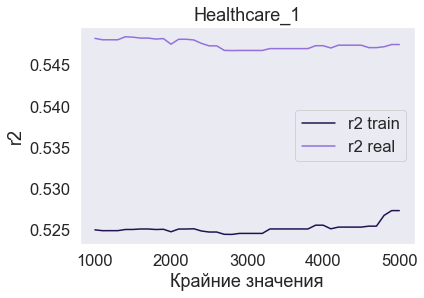

1400.0


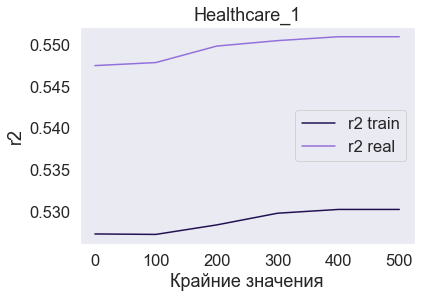

400.0


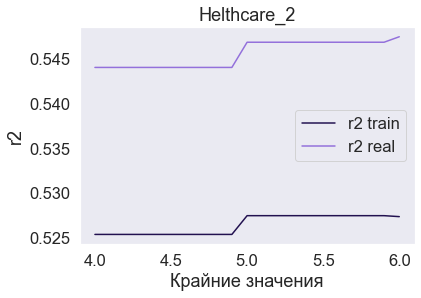

6.0


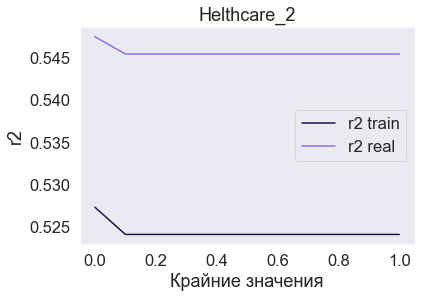

0.0


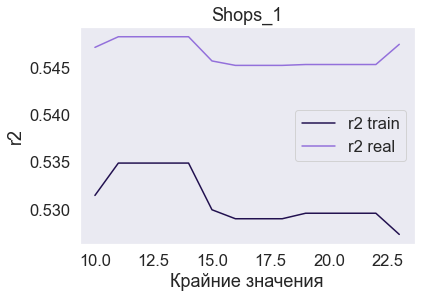

11.0


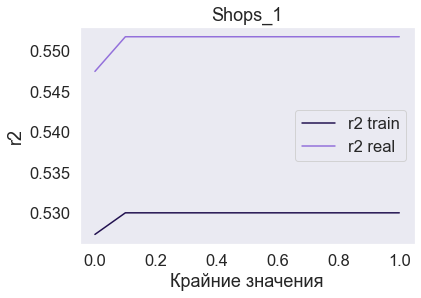

0.1


In [39]:
predlist('Rooms', np.linspace(1, 20, 20), 'after')
predlist('Rooms', np.linspace(0, 15, 16), 'before')
predlist('Square', np.linspace(50, 200, 16), 'after')
predlist('Square', np.linspace(0, 15, 16), 'before')
predlist('LifeSquare', np.linspace(50, 200, 16), 'after') 
predlist('LifeSquare', np.linspace(0, 15, 16), 'before')
predlist('KitchenSquare', np.linspace(2, 75, 71), 'after')
predlist('KitchenSquare', np.linspace(0, 15, 16), 'before')
predlist('Floor', np.linspace(20, 42, 23), 'after')
predlist('Floor', np.linspace(0, 15, 16), 'before')
predlist('HouseFloor', np.linspace(30, 120, 91), 'after')
predlist('HouseFloor', np.linspace(0, 15, 16), 'before')
predlist('Ecology_1', np.linspace(0.3, 0.5, 21), 'after')
predlist('Ecology_1', np.linspace(0, 0.05, 6), 'before')
predlist('Social_1', np.linspace(60, 70, 11), 'after')
predlist('Social_1', np.linspace(0, 5, 6), 'before')
predlist('Social_2', np.linspace(14000, 20000, 61), 'after')
predlist('Social_2', np.linspace(0, 5000, 51), 'before')
predlist('Social_3', np.linspace(10, 60, 51), 'after')
predlist('Social_3', np.linspace(0, 5, 6), 'before')
predlist('Healthcare_1', np.linspace(1000, 5000, 41), 'after')
predlist('Healthcare_1', np.linspace(0, 500, 6), 'before')
predlist('Helthcare_2', np.linspace(4, 6, 21), 'after')
predlist('Helthcare_2', np.linspace(0, 1, 11), 'before')
predlist('Shops_1', np.linspace(10, 23, 14), 'after')
predlist('Shops_1', np.linspace(0, 1, 11), 'before')

Определим среднее и медианы признаков

In [40]:
Med_R = np.median(data['Rooms'])
Mean_S = np.mean(data['Square'])
Mean_LS = np.mean(data['LifeSquare'])
Med_KS = np.median(data['KitchenSquare'])
Med_F = np.median(data['Floor'])
Med_HF = np.median(data['HouseFloor'])
Mean_E_1 = np.mean(data['Ecology_1'])
Med_S_1 = np.median(data['Social_1'])
Med_S_2 = np.median(data['Social_2'])
Med_S_3 = np.median(data['Social_3'])
Mean_H_1 = np.median(data['Healthcare_1'])
Med_H_2 = np.median(data['Helthcare_2'])
Med_Sh_1 = np.median(data['Shops_1'])

Ограничим пределы значений признаков в соответствии с получеными значениями.

In [41]:
data.loc[data['Rooms'] > 5, 'Rooms'] = Med_R
data.loc[data['Square'] > 130, 'Square'] = Mean_S
data.loc[data['LifeSquare'] > 80, 'LifeSquare'] = Mean_LS
data.loc[data['KitchenSquare'] < 7, 'KitchenSquare'] = Med_KS
data.loc[data['KitchenSquare'] > 43.71, 'KitchenSquare'] = Med_KS
data.loc[data['Floor'] < 1, 'Floor'] = Med_F
data.loc[data['Floor'] > 25, 'Floor'] = Med_F
data.loc[data['HouseFloor'] < 1, 'HouseFloor'] = Med_HF
data.loc[data['HouseFloor'] > 40, 'HouseFloor'] = Med_HF
data.loc[data['Ecology_1'] < 0.04, 'Ecology_1'] = Mean_E_1
data.loc[data['Ecology_1'] > 0.44, 'Ecology_1'] = Mean_E_1
data.loc[data['Social_1'] < 0, 'Social_1'] = Med_S_1
data.loc[data['Social_1'] > 60, 'Social_1'] = Med_S_1
data.loc[data['Social_2'] > 14500, 'Social_2'] = Med_S_2
data.loc[data['Social_2'] < 1900, 'Social_2'] = Med_S_2
data.loc[data['Social_3'] < 0, 'Social_3'] = Med_S_3
data.loc[data['Social_3'] > 45, 'Social_3'] = Med_S_3
data.loc[data['Healthcare_1'] < 400, 'Healthcare_1'] = Mean_H_1
data.loc[data['Healthcare_1'] > 1400, 'Healthcare_1'] = Mean_H_1
data.loc[data['Helthcare_2'] < 0, 'Helthcare_2'] = Med_H_2
data.loc[data['Helthcare_2'] > 5, 'Helthcare_2'] = Med_H_2
data.loc[data['Shops_1'] < 0.1, 'Shops_1'] = Med_Sh_1
data.loc[data['Shops_1'] > 11, 'Shops_1'] = Med_Sh_1

## Построение новых признаков

MedPriceByDistrictNovelty<br/>
Оценка по новизне района

In [42]:
pb_dh = data.groupby(['DistrictId', 'HouseYear'], as_index=False).agg({'Price':'median'})\
                                .rename(columns={'Price':'MedPriceByDistrictNovelty'})
data = data.merge(pb_dh, on=['DistrictId', 'HouseYear'], how='left')

MedPriceBySocial<br/>
Оценка по социальным условиям

In [43]:
pb_soc = data.groupby(['Social_1', 'Social_3'], as_index=False).agg({'Price':'median'})\
                                .rename(columns={'Price':'MedPriceBySocial'})
data = data.merge(pb_soc, on=['Social_1', 'Social_3'], how='left')

MedPriceByDistrictAltitude<br/>
Оценка по высотности района

In [44]:
pb_sh = data.groupby(['DistrictId', 'HouseFloor'], as_index=False).agg({'Price':'median'})\
                                .rename(columns={'Price':'MedPriceByDistrictAltitude'})
data = data.merge(pb_sh, on=['DistrictId', 'HouseFloor'], how='left')

MedPriceByHealthcare<br/>
Оценка по медицинскому обслуживанию

In [45]:
pb_h = data.groupby(['Helthcare_2', 'Healthcare_1'], as_index=False).agg({'Price':'median'})\
                                .rename(columns={'Price':'MedPriceByHealthcare'})
data = data.merge(pb_h, on=['Helthcare_2', 'Healthcare_1'], how='left')

MedPriceByEcology<br/>
Оценка по экологическому состоянию

In [46]:
pb_de = data.groupby(['Ecology_1', 'Ecology_3'], as_index=False).agg({'Price':'median'})\
                                .rename(columns={'Price':'MedPriceByEcology'})
data = data.merge(pb_de, on=['Ecology_1', 'Ecology_3'], how='left')

## Отбор признаков

In [47]:
feature_names = data.columns.drop('Price')

In [48]:
feature_names

Index(['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor',
       'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2', 'Ecology_3',
       'Social_1', 'Social_2', 'Social_3', 'Healthcare_1', 'Helthcare_2',
       'Shops_1', 'Shops_2', 'MedPriceByDistrictNovelty', 'MedPriceBySocial',
       'MedPriceByDistrictAltitude', 'MedPriceByHealthcare',
       'MedPriceByEcology'],
      dtype='object')

## Разбиение на train и test

In [49]:
X = pd.DataFrame(data[feature_names], columns=feature_names)
y = pd.DataFrame(data['Price'], columns=['Price'])

In [50]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

## Построение модели

In [51]:
regr = RandomForestRegressor(max_depth=9, max_features=7, n_estimators=100, random_state=42)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_valid)
y_pred_train = regr.predict(X_train)
print('r2 train', r2_score(y_train, y_pred_train))
print('r2 test', r2_score(y_valid, y_pred))

r2 train 0.9154321898072991
r2 test 0.8524763548053682


### Важность признаков

In [52]:
importance_feature = pd.DataFrame(zip(data.columns, regr.feature_importances_), 
                                   columns=['feature', 'importance'])

### 5 лучших признаков

In [53]:
importance_feature.sort_values(by='importance', ascending=False).head()

,feature,importance
18,Price,0.352570
20,MedPriceBySocial,0.220812
2,Square,0.142824
1,Rooms,0.076454
19,MedPriceByDistrictNovelty,0.056596


### 5 худших признаков

In [54]:
importance_feature.sort_values(by='importance', ascending=False).tail()

,feature,importance
16,Shops_1,0.002529
14,Healthcare_1,0.001077
10,Ecology_3,0.000316
17,Shops_2,0.000182
9,Ecology_2,0.000064


In [55]:
def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):
    print("Train R2:\t" + str(round(r2_score(train_true_values, train_pred_values), 3)))
    print("Test R2:\t" + str(round(r2_score(test_true_values, test_pred_values), 3)))
    
    plt.figure(figsize=(18,10))
    
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(122)
    sns.scatterplot(x=test_pred_values, y=test_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')

    plt.show()

Train R2:	0.915
Test R2:	0.852


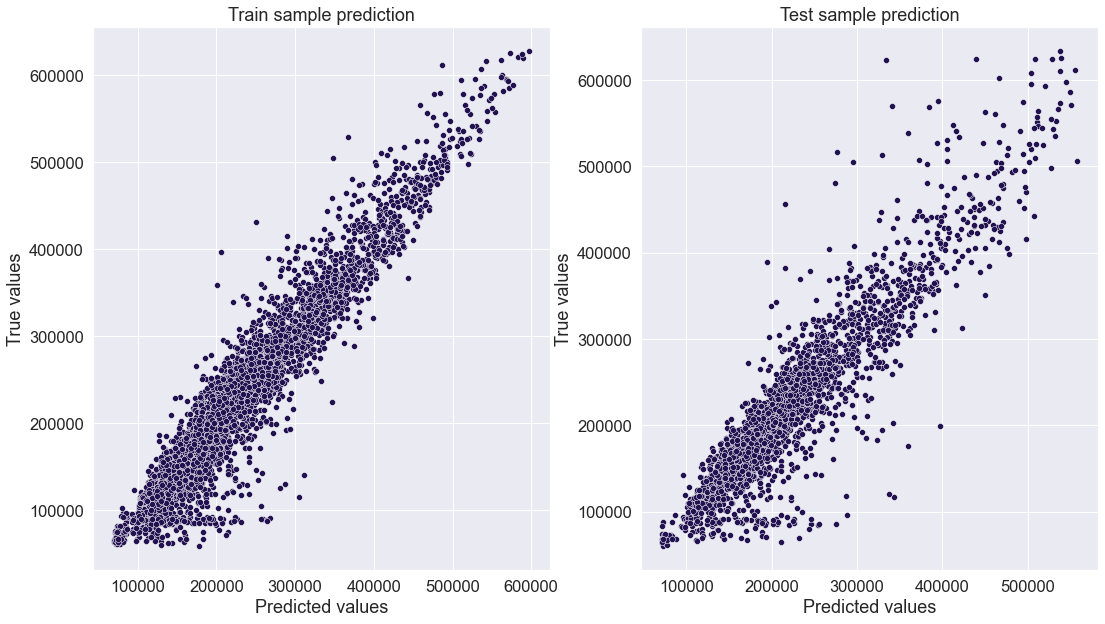

In [56]:
evaluate_preds(y_train['Price'].values, y_pred_train.flatten(), y_valid['Price'].values, y_pred.flatten())

## Кросс-валидация

In [57]:
cv_score = cross_val_score(regr, X, y, scoring='r2', cv=KFold(n_splits=5, shuffle=True, random_state=21))
cv_score.mean()

0.8537013147523451

## Прогнозирование на тестовом датасете

In [58]:
test = pd.read_csv('test.csv')

In [59]:
test

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,4567,44,1.0,36.847630,19.094182,5.0,5,9.0,1970,0.036122,B,B,24,4378,0,1036.0,1,1,B
1,5925,62,1.0,42.493907,42.568133,10.0,7,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A
2,960,27,2.0,59.463678,NaN,9.0,19,19.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B
3,3848,23,3.0,49.646030,33.893825,6.0,2,2.0,1965,0.014073,B,B,2,475,0,NaN,0,0,B
4,746,74,1.0,53.837056,NaN,1.0,8,17.0,1977,0.309479,B,B,35,7715,4,990.0,0,6,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,10379,29,2.0,43.177521,30.339945,5.0,6,5.0,1962,0.069660,B,B,31,6119,4,NaN,1,2,B
4996,16138,38,3.0,93.698122,94.521465,10.0,21,27.0,2018,0.060753,B,B,15,2787,2,520.0,0,7,B
4997,3912,101,1.0,33.656723,19.003259,5.0,2,5.0,1966,0.038693,B,B,28,6533,1,1015.0,2,5,B
4998,5722,10,1.0,38.635155,20.976257,9.0,8,14.0,1970,0.089040,B,B,33,7976,5,NaN,0,11,B


In [60]:
prediction = pd.DataFrame(test['Id'], columns=['Id'])

Функции для обработки признаков на тестовом датасете

In [61]:
def new_feat(sample_train, sample_test, n1, n2, n3):
    DN = []
    for i, ind in enumerate(sample_test.index):
        d_index = sample_train.loc[sample_train[n1] == sample_test.loc[ind, n1], n1].index
        h_index = sample_train.loc[sample_train[n2] == sample_test.loc[ind, n2], n2].index
        for d in d_index:
            if (d in h_index) & (i == len(DN)):
                DN.append(sample_train.loc[d, n3])
        if (sample_test.loc[ind, n1] in sample_train[n1]) & (i == len(DN)):
            DN.append(sample_train.loc[d_index, n3].median())
        if (sample_test.loc[ind, n2] in sample_train[n2]) & (i == len(DN)):
            DN.append(sample_train.loc[h_index, n3].median())
    sample_test[n3] = DN
    sample_test.loc[np.isnan(sample_test[n3]), n3] = sample_train[n3].median()

In [62]:
def test_data_transform(sample, train):
    sample.drop('Id', axis=1, inplace=True)
    sample.loc[sample['Shops_2'] == 'A', 'Shops_2'] = 0
    sample.loc[sample['Shops_2'] == 'B', 'Shops_2'] = 1
    sample.loc[sample['Ecology_2'] == 'A', 'Ecology_2'] = 0
    sample.loc[sample['Ecology_2'] == 'B', 'Ecology_2'] = 1
    sample.loc[sample['Ecology_3'] == 'A', 'Ecology_3'] = 0
    sample.loc[sample['Ecology_3'] == 'B', 'Ecology_3'] = 1
    
    sample.loc[np.isnan(sample['Healthcare_1']), 'Healthcare_1'] = Mean_H_1
    
    sample.loc[sample['Square'] < 11, 'Square'] = np.NaN
    sample.loc[sample['Square'] > 250, 'Square'] = np.NaN
    sample.loc[sample['LifeSquare'] < 6, 'LifeSquare'] = np.NaN
    sample.loc[sample['LifeSquare'] > 200, 'LifeSquare'] = np.NaN
    sample.loc[sample['KitchenSquare'] < 5, 'KitchenSquare'] = np.NaN
    sample.loc[sample['KitchenSquare'] > 50, 'KitchenSquare'] = np.NaN

    sample.loc[~np.isnan(sample['Square']) & np.isnan(sample['LifeSquare']), 'LifeSquare'] = sample['Square'] / sq_ls
    sample.loc[~np.isnan(sample['Square']) & np.isnan(sample['KitchenSquare']), 'KitchenSquare'] = sample['Square'] / sq_ks
    sample.loc[np.isnan(sample['Square']) & ~np.isnan(sample['LifeSquare']), 'Square'] = sample['LifeSquare'] * sq_ls
    sample.loc[np.isnan(sample['Square']) & ~np.isnan(sample['KitchenSquare']), 'Square'] = sample['KitchenSquare'] * sq_ks
    sample.loc[np.isnan(sample['Square']), 'Square'] = Mean_S
    sample.loc[np.isnan(sample['LifeSquare']), 'LifeSquare'] = Mean_LS
    sample.loc[np.isnan(sample['KitchenSquare']), 'KitchenSquare'] = Med_KS

    sample.loc[sample['Square'] < sample['LifeSquare'], 'LifeSquare'] = sample['Square'] / sq_ls
    sample.loc[sample['Square'] < sample['KitchenSquare'], 'KitchenSquare'] = sample['Square'] / sq_ks
    sample.loc[sample['LifeSquare'] < sample['KitchenSquare'], 'LifeSquare'] = Mean_LS
    sample.loc[sample['LifeSquare'] < sample['KitchenSquare'], 'KitchenSquare'] = Med_KS
    
    sample.loc[sample['Rooms'] < 1, 'Rooms'] = np.NaN
    sample.loc[sample['Rooms'] > 6, 'Rooms'] = np.NaN
    sample.loc[np.isnan(sample['Rooms']), 'Rooms'] = round(sample.loc[np.isnan(sample['Rooms']), 'Square'] / sq_r)
    
    ind = sample.loc[sample['Floor'] > sample['HouseFloor'], 'Floor'].index
    fl = sample.loc[sample['Floor'] > sample['HouseFloor'], 'Floor']
    hf = sample.loc[sample['Floor'] > sample['HouseFloor'], 'HouseFloor']
    sample.loc[ind, 'HouseFloor'] = fl
    sample.loc[ind, 'Floor'] = hf
    
    sample.loc[sample['HouseYear'] == 4968, 'HouseYear'] = 1968
    sample.loc[sample['HouseYear'] == 20052011, 'HouseYear'] = 2005
    sample.loc[sample['HouseYear'] > datetime.now().year, 'HouseYear'] = datetime.now().year
    sample.loc[sample['HouseYear'] < 1900, 'HouseYear'] = datetime.now().year
    
    sample.loc[sample['Rooms'] > 5, 'Rooms'] = Med_R
    sample.loc[sample['Square'] > 130, 'Square'] = Mean_S
    sample.loc[sample['LifeSquare'] > 80, 'LifeSquare'] = Mean_LS
    sample.loc[sample['KitchenSquare'] < 7, 'KitchenSquare'] = Med_KS
    sample.loc[sample['KitchenSquare'] > 43.71, 'KitchenSquare'] = Med_KS
    sample.loc[sample['Floor'] < 1, 'Floor'] = Med_F
    sample.loc[sample['Floor'] > 25, 'Floor'] = Med_F
    sample.loc[sample['HouseFloor'] < 1, 'HouseFloor'] = Med_HF
    sample.loc[sample['HouseFloor'] > 40, 'HouseFloor'] = Med_HF
    sample.loc[sample['Ecology_1'] < 0.04, 'Ecology_1'] = Mean_E_1
    sample.loc[sample['Ecology_1'] > 0.44, 'Ecology_1'] = Mean_E_1
    sample.loc[sample['Social_1'] < 0, 'Social_1'] = Med_S_1
    sample.loc[sample['Social_1'] > 60, 'Social_1'] = Med_S_1
    sample.loc[sample['Social_2'] > 14500, 'Social_2'] = Med_S_2
    sample.loc[sample['Social_2'] < 1900, 'Social_2'] = Med_S_2
    sample.loc[sample['Social_3'] < 0, 'Social_3'] = Med_S_3
    sample.loc[sample['Social_3'] > 45, 'Social_3'] = Med_S_3
    sample.loc[sample['Healthcare_1'] < 400, 'Healthcare_1'] = Mean_H_1
    sample.loc[sample['Healthcare_1'] > 1400, 'Healthcare_1'] = Mean_H_1
    sample.loc[sample['Helthcare_2'] < 0, 'Helthcare_2'] = Med_H_2
    sample.loc[sample['Helthcare_2'] > 5, 'Helthcare_2'] = Med_H_2
    sample.loc[sample['Shops_1'] < 0.1, 'Shops_1'] = Med_Sh_1
    sample.loc[sample['Shops_1'] > 11, 'Shops_1'] = Med_Sh_1
    
    new_feat(train, sample, 'DistrictId', 'HouseYear', 'MedPriceByDistrictNovelty')
    new_feat(train, sample, 'Social_1', 'Social_3', 'MedPriceBySocial')
    new_feat(train, sample, 'DistrictId', 'HouseFloor', 'MedPriceByDistrictAltitude')
    new_feat(train, sample, 'Helthcare_2', 'Healthcare_1', 'MedPriceByHealthcare')
    new_feat(train, sample, 'Ecology_3', 'Ecology_1', 'MedPriceByEcology')
    
    return sample

Оптимизация и обработка признаков

In [63]:
optimize(test)

In [64]:
test = test_data_transform(test, data)

Построение модели и предсказание таргетной переменной

In [65]:
regr = RandomForestRegressor(max_depth=9, max_features=7, n_estimators=100, random_state=100)
regr.fit(data[feature_names], data['Price'])
y_pred = regr.predict(test)

Сохранение результатов

In [66]:
prediction['Price'] = y_pred

In [67]:
prediction.to_csv('prediction.csv', index=False, encoding='utf-8', sep=',')